# 5. LDA 

In [1]:
import numpy as np
import pandas as pd
from TTMonitor.preprocess import *
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Setup

In [2]:
COUNTRY = "uk"
NAME ="covid"

DATA_PATH = "C:/Users/AMOR 1/Documents/Uni/Twitter-privacy-lda-topic-modelling/data/uk_rawdata_20201226.pkl" # "uk_raw.pkl"

preprocess_params = {"include_hashtags": True}

include_keywords = ['covid', 'coronavirus', 'virus', 'covidiot', 'trumpvirus', 'test', 'safe',
 'coronaswimwewr', 'pandemic', 'mask', 'viruscoronavirus', 'wearamask', 'quarantine',
 'stayhome', 'sick', 'coronaviru', 'coviddays', 'CDC', 'Wuhancoronavirus', 'Wuhanlockdown',
 'Ncov', 'Wuhan', 'N95', 'Kungflu', 'Epidemic', 'outbreak', 'Sinophobia', 'China', 'covid-19',
 'covid19', 'sars-cov-2', 'COVIDー19', 'COVD', 'pandemic', 'coronapocalypse', 'Coronials', 'canceleverything',
 'SocialDistancingNow', 'Social', 'panicbuy', 'panic', '14DayQuarantine', 'DuringMy14DayQuarantine', 'InMyQuarantineSurvivalKit',
 'panic-buy', 'panic-shop', 'coronakindness', 'quarantinelife', 'chinesevirus7', 'chinese', 'stayhomechallenge',
 'sflockdown', 'DontBeASpreader', 'lockdown', 'lock', 'shelteringinplace', 'sheltering', 'staysafestayhome',
 'trumppandemic', 'flattenthecurve', 'flatten', 'china', 'chinavirus', 'quarentinelife',
 'PPEshortage', 'saferathome', 'stayathome', 'stayhome', 'GetMePPE', 'covidiot', 'epitwitter',
 'pandemie', 'wear', 'wearamask', 'kung', 'covididiot', 'COVID__19']
include_keywords = [word.lower() for word in include_keywords]
exclude_keywords = []

from nltk.corpus import stopwords
stopwords.words("english")
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
stop_words = ENGLISH_STOP_WORDS

from nltk.tokenize.casual import TweetTokenizer
class SkTokenizer():
    def __init__(self):
        tfidf = TfidfVectorizer()
        self.tokenize = tfidf.build_tokenizer()
tokenizer = SkTokenizer()
#tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
lda_params = {"stop_words":stop_words, "tokenizer":tokenizer, "enrich":True,
              "doc_threshold":10, "similarity_threshold":0.3}

fit_params={"n_topics":20, "n_jobs":1, "no_below":5,
            "no_above":0.8,"passes":200,"chunksize":100}

In [3]:
exclude_keywords = pd.read_csv('C:\Users\AMOR 1\Documents\Uni\Twitter-privacy-lda-topic-modelling\dictionaries\Obscenity.txt',  header=None)
exclude_keywords = exclude_keywords[0].tolist()
print((exclude_keywords))

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-3-03681d566f62>, line 1)

# Load Data

In [28]:
#data= read_datafiles("C://Users/matze/Documents/Python_Projects/twitter-mining/data/uk")
#pickle.dump(data, open( "uk_raw.pkl", "wb" ) )
data1 = pickle.load( open( DATA_PATH, "rb" ) )
#path = r"C:\Users\AMOR 1\Documents\Uni\Twitter-privacy-lda-topic-modelling\data\experiment.tsv"
#df=pd.read_csv(path, sep='\t', header=None)
#df[0] = df[0].str.replace('@xxx', '')

In [13]:


df.columns = ['full_text', 'private']
df['id_str'] = list(range(0,2870))
df['hashtags'] = list(range(0,2870))

In [14]:
type(df["full_text"][1])

str

In [15]:
def get_hashtagslist(string):
    ret = []
    s=''
    hashtag = False
    for char in string:
        if char=='#':
            hashtag = True
            if s:
                ret.append(s)
                s=''           
            continue

        # take only the prefix of the hastag in case contain one of this chars (like on:  '#happy,but i..' it will takes only 'happy'  )
        if hashtag and char in [' ','.',',','(',')',':','{','}'] and s:
            ret.append(s)
            s=''
            hashtag=False 

        if hashtag:
            s+=char

    if s:
        ret.append(s)

    return list(set([word for word in ret if len(ret)>1 and len(ret)<20]))

import re
text = "#promovolt #1st # promovolt #123"
re.findall(r'\B#\w*[a-zA-Z]+\w*', text)

['#promovolt', '#1st']

In [17]:
l = []
for i in range(0, len(df)):
    l.append(re.findall(r'\B#\w*[a-zA-Z]+\w*', df["full_text"][i]))



In [22]:
df['hashtags']  = l

0                     []
1                     []
2                     []
3                     []
4     [#tiredofyourcrap]
5                     []
6                     []
7      [#mustfindescape]
8                     []
9                     []
10             [#whores]
11                    []
12                    []
13                    []
14       [#haha, #homos]
15                [#fag]
16                    []
17                    []
18                    []
19                    []
Name: hashtags, dtype: object

In [23]:
data1 = df.to_dict('records')

In [4]:
data1.head

AttributeError: 'list' object has no attribute 'head'

In [41]:
data1 = pickle.load( open( DATA_PATH, "rb" ) )
data1[0]

{'created_at': 'Tue Nov 10 22:33:40 +0000 2020',
 'id_str': '1326291965814693890',
 'user_id_str': '2288815953',
 'full_text': 'Just watched the #theDianainterviewrevengeifaprincess programme on #itv she was made out to be unstable but it would appear she was absolutely right in everything she said. The powers that be were out to get her and now more than ever I believe she was killed!',
 'hashtags': ['theDianainterviewrevengeifaprincess', 'itv'],
 'lang': 'en',
 'place_full_name': 'Slough, South East',
 'country_code': 'GB',
 'coordinates': [[[-0.660061, 51.490484],
   [-0.660061, 51.538905],
   [-0.525138, 51.538905],
   [-0.525138, 51.490484]]],
 'center_coord_X': -0.5925995000000001,
 'center_coord_Y': 51.514694500000004}

In [27]:
print(df["full_text"][4])
re.findall(r'\B#\w*[a-zA-Z]+\w*', df["full_text"][4])

You need to swallow some make-up or something because honey on the inside your just plain ugly! #tiredofyourcrap


['#tiredofyourcrap']

In [7]:
j = 0
for b in range(0, 571906, 1000):
    j = j + 1000
print(j)

572000


In [55]:
data1 = pickle.load( open( DATA_PATH, "rb" ) )


list

In [56]:
data1[0]

{'created_at': 'Tue Nov 10 22:33:40 +0000 2020',
 'id_str': '1326291965814693890',
 'user_id_str': '2288815953',
 'full_text': 'Just watched the #theDianainterviewrevengeifaprincess programme on #itv she was made out to be unstable but it would appear she was absolutely right in everything she said. The powers that be were out to get her and now more than ever I believe she was killed!',
 'hashtags': ['theDianainterviewrevengeifaprincess', 'itv'],
 'lang': 'en',
 'place_full_name': 'Slough, South East',
 'country_code': 'GB',
 'coordinates': [[[-0.660061, 51.490484],
   [-0.660061, 51.538905],
   [-0.525138, 51.538905],
   [-0.525138, 51.490484]]],
 'center_coord_X': -0.5925995000000001,
 'center_coord_Y': 51.514694500000004}

In [21]:
l = pd.read_pickle(r"C:\Users\AMOR 1\Documents\Uni\Twitter-privacy-lda-topic-modelling\data\list_neg_clf_xgb.pkl")
l.shape


C:\Users\AMOR 1\anaconda3\envs\Twitter_job\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(571000, 1)

In [22]:
bool_list = list(map(bool,l[0].tolist()))
i = 0
for b in bool_list:
    if b == True:
        i = i +1
print(i)

40914


C:\Users\AMOR 1\anaconda3\envs\Twitter_job\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
data11 = []
for i in range(len(bool_list)):
    if bool_list[i] == True:
        data11.append(data1[i])


C:\Users\AMOR 1\anaconda3\envs\Twitter_job\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
data1=data11

C:\Users\AMOR 1\anaconda3\envs\Twitter_job\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
len(data1)

C:\Users\AMOR 1\anaconda3\envs\Twitter_job\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


40914

# Preprocess
* define preprocessing
* define filter
* define stopwords

In [29]:
%%time
# PReprocessing
#json_data = [parse_tweet(data) for data in json_data]
data2 = parse_tweets(data1, **preprocess_params)


Wall time: 10.4 s


In [ ]:
%%time
# Filter
# data = filter_tweets(data2, include_keywords)
data = filter_tweets(data, exclude_keywords, include=False)
# print(data)
# data = data2[:]


  0%|          | 0/571906 [00:00<?, ?it/s]

In [24]:
len(data)

326093

# LDA

In [28]:
%%time
from TTMonitor.TwitterLDA import TwitterLDA
tlda = TwitterLDA(data, **lda_params)
tlda.fit(**fit_params)
topics, scores = tlda.classify_tweets()
print(tlda.coherence)
tlda.get_topics()


C:\Users\AMOR 1\anaconda3\envs\Twitter_job\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Done with Pooling
Done with Enriching
Done with tokenizing
Done with Initializing
start fitting
Done fitting
0.5502533652836822
Wall time: 15min 7s


[(0,
  [('team', 0.017930519),
   ('work', 0.016049175),
   ('people', 0.015955046),
   ('day', 0.0140656065),
   ('business', 0.013359326),
   ('women', 0.012619755),
   ('community', 0.01198313),
   ('job', 0.010627604),
   ('staysafe', 0.01053047),
   ('great', 0.00955417),
   ('like', 0.009073881),
   ('jobs', 0.0088155195),
   ('support', 0.008815292),
   ('new', 0.008423447),
   ('help', 0.007283029)]),
 (1,
  [('uk', 0.03079714),
   ('brexit', 0.02996864),
   ('deal', 0.01866931),
   ('money', 0.01206588),
   ('eu', 0.011261359),
   ('scotland', 0.00939728),
   ('shit', 0.008088261),
   ('people', 0.0075964504),
   ('just', 0.0075496077),
   ('fucking', 0.007410134),
   ('europe', 0.00731861),
   ('government', 0.007055536),
   ('twitch', 0.006783098),
   ('food', 0.006610169),
   ('brexitshambles', 0.006529599)]),
 (2,
  [('week', 0.011363657),
   ('people', 0.008669579),
   ('just', 0.008265886),
   ('day', 0.008164016),
   ('talk', 0.007839867),
   ('hope', 0.007816767),
   (

In [29]:
import pyLDAvis.gensim
tlda.save_to_disk("neg_topics.pkl")
pyLDAvis.enable_notebook()

m =tlda
lda = m.model
dictionary = m.doc_id2bigram
corpus = m.corpus_bi
p = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.save_html(p,"neg.html")

C:\Users\AMOR 1\anaconda3\envs\Twitter_job\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
tlda.get_all_document_topics()

C:\Users\AMOR 1\anaconda3\envs\Twitter_job\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
tlda.distr_df

C:\Users\AMOR 1\anaconda3\envs\Twitter_job\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         1         2         3         4         5         6   \
0     0.002278  0.000135  0.000135  0.023546  0.000135  0.123270  0.000135   
1     0.005781  0.000111  0.000111  0.104908  0.000111  0.053326  0.000111   
2     0.043594  0.000106  0.000106  0.496526  0.032249  0.139306  0.003222   
3     0.011012  0.000323  0.000323  0.000323  0.110310  0.598791  0.000323   
4     0.047380  0.000168  0.003355  0.062104  0.000168  0.087798  0.000168   
...        ...       ...       ...       ...       ...       ...       ...   
1941  0.000089  0.988613  0.000089  0.006216  0.000089  0.000089  0.000089   
1942  0.000091  0.998276  0.000091  0.000091  0.000091  0.000091  0.000091   
1943  0.000094  0.998211  0.000094  0.000094  0.000094  0.000094  0.000094   
1944  0.000091  0.998276  0.000091  0.000091  0.000091  0.000091  0.000091   
1945  0.000091  0.998276  0.000091  0.000091  0.000091  0.000091  0.000091   

            7         8         9         10        11        12        13  \
0     0.000135  0.033714  0.000135  0.000135  0.309784  0.033712  0.000135   
1     0.000111  0.080647  0.015228  0.021959  0.163301  0.537085  0.000111   
2     0.000106  0.000106  0.000106  0.000106  0.053922  0.208818  0.000106   
3     0.000323  0.025162  0.000323  0.000323  0.136485  0.000323  0.000323   
4     0.007145  0.108757  0.014864  0.000168  0.638416  0.000168  0.000168   
...        ...       ...       ...       ...       ...       ...       ...   
1941  0.000089  0.000089  0.000089  0.000089  0.003664  0.000089  0.000089   
1942  0.000091  0.000091  0.000091  0.000091  0.000091  0.000091  0.000091   
1943  0.000094  0.000094  0.000094  0.000094  0.000094  0.000094  0.000094   
1944  0.000091  0.000091  0.000091  0.000091  0.000091  0.000091  0.000091   
1945  0.000091  0.000091  0.000091  0.000091  0.000091  0.000091  0.000091   

            14        15        16        17        18        19  
0     0.004729  0.000135  0.467346  0.000135  0.000135  0.000135  
1     0.000111  0.000111  0.012317  0.004335  0.000111  0.000111  
2     0.000106  0.000106  0.000106  0.021092  0.000106  0.000106  
3     0.016582  0.000323  0.083792  0.013986  0.000323  0.000323  
4     0.000168  0.008220  0.000168  0.020280  0.000168  0.000168  
...        ...       ...       ...       ...       ...       ...  
1941  0.000089  0.000089  0.000089  0.000089  0.000089  0.000089  
1942  0.000091  0.000091  0.000091  0.000091  0.000091  0.000091  
1943  0.000094  0.000094  0.000094  0.000094  0.000094  0.000094  
1944  0.000091  0.000091  0.000091  0.000091  0.000091  0.000091  
1945  0.000091  0.000091  0.000091  0.000091  0.000091  0.000091  

[1946 rows x 20 columns]

In [14]:
from datetime import date

In [15]:
identifier = datetime.now().strftime("%y%m%d%H%M") +"_"+NAME+"_"+COUNTRY
identifier

'2106032317_covid_uk'

In [16]:
tlda.save_to_disk(identifier+"topics.pkl")

# Vizualize

(31517, 14)


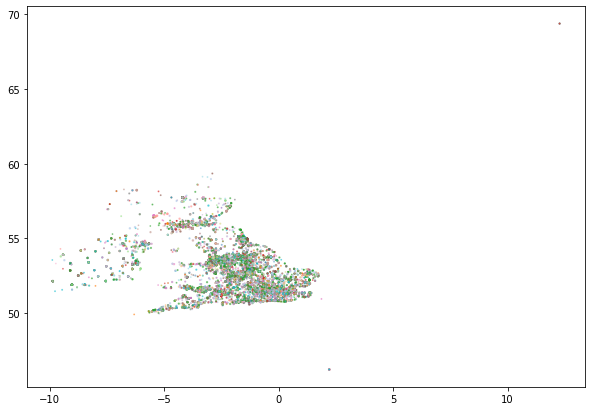

In [17]:
import pickle
import matplotlib.pyplot as plt
tweets = tlda.tweet_df
#tweets,topics = pickle.load(open("D://twitter_data/indonesia_results.pkl","rb"))
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(tweets.center_coord_X, tweets.center_coord_Y, s=tweets.pred_score*3, c=tweets.pred_topic, cmap="tab20",alpha=0.5)
print(tweets.shape)

(7578, 50)
Wall time: 36.7 s


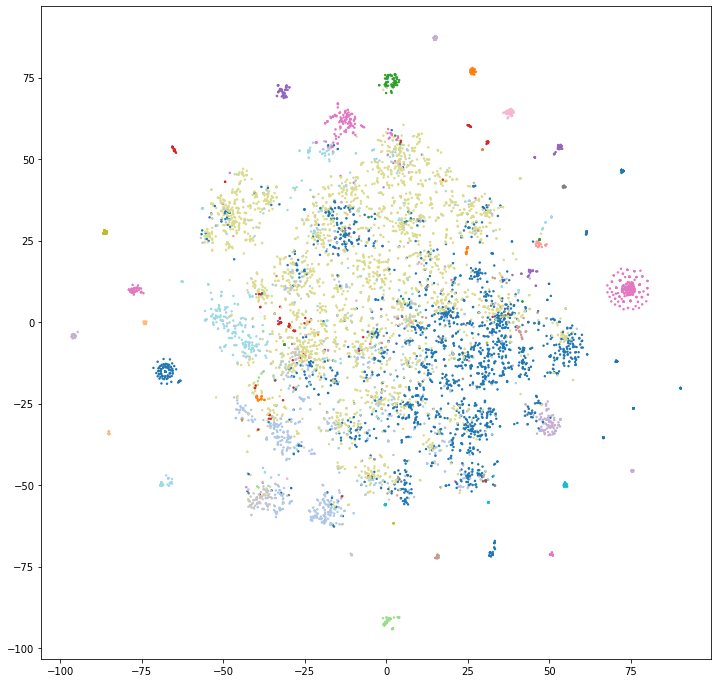

In [37]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = stop_words, max_df = 0.9, min_df = 10)
from sklearn.decomposition import TruncatedSVD
#doc_df, doc_tokens, tweet_df, vectorizer
tweets = tlda.tweet_df
tweets = tweets[tlda.tweet_df.pred_score>0.7]
tocs = tfidf.fit_transform(tweets.full_text)
sdv = TruncatedSVD(n_components=50, random_state=5)
sdv_tocs = sdv.fit_transform(tocs)


from sklearn.manifold import TSNE
print(sdv_tocs.shape)
tsne = TSNE(random_state=5)
res = tsne.fit_transform(sdv_tocs)
res = pd.DataFrame(res, columns=["x","y"])
fix,ax = plt.subplots(figsize=(12,12))
plt.scatter(res.x,res.y, s=2, c = tweets.pred_topic, cmap="tab20")

In [19]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
m =tlda
lda = m.model
dictionary = m.doc_id2bigram
corpus = m.corpus_bi

p = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
#pyLDAvis.save_html(p, identifier+".html")
pyLDAvis.show(p)

C:\Users\AMOR 1\anaconda3\envs\Twitter_job\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: Object of type complex is not JSON serializable